# TASK #1: PROJECT OVERVIEW


Denoising autoencoders are an extension of simple autoencoders; however, it’s worth noting that denoising autoencoders were not originally meant to automatically denoise an image.

# TASK #2: IMPORT LIBRARIES AND DATASET

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


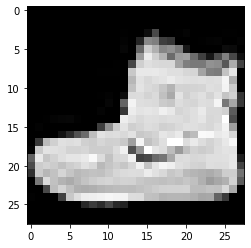

In [ ]:
# Visualize a sample image
plt.imshow(x_train[0],cmap="gray")

In [ ]:
# check out the shape of the training data
x_train.shape

(60000, 28, 28)

In [ ]:
# check out the shape of the testing data
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

# TASK #3: PERFORM DATA VISUALIZATION

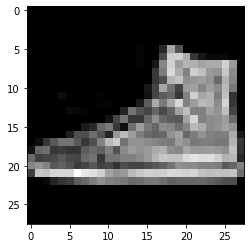

In [ ]:
# Let's view some images!
i = random.randint(1,60000)
plt.imshow(x_train[i],cmap='gray')

In [ ]:
label=y_train[i]
label

7

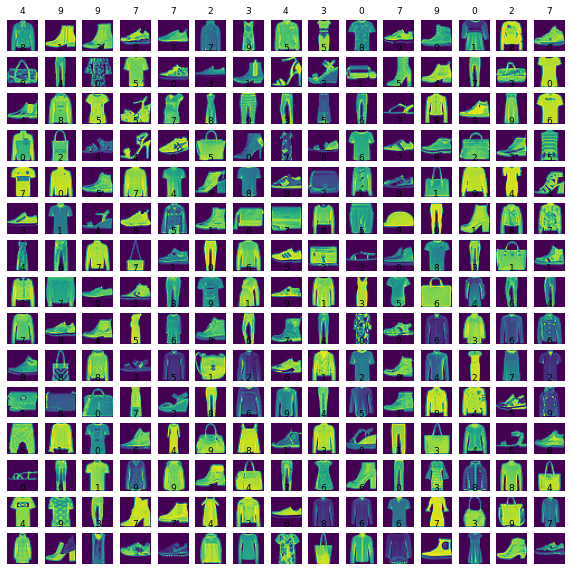

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0,W_grid*L_grid):
  index = np.random.randint(0,n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index],fontsize=9)
  axes[i].axis("off")


# TASK #4: PERFORM DATA PREPROCESSING

In [ ]:
# normalize data
x_train=x_train/255
x_test = x_test/255

In [ ]:
# add some noise
noise_factor = 0.3

noise_dataset = []

for img in x_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image,0,1)
  noise_dataset.append(noisy_image)

In [ ]:
noise_dataset = np.array(noise_dataset)

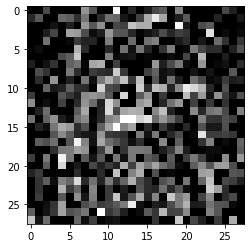

In [ ]:
plt.imshow(noise_dataset[92],cmap = 'gray')

In [ ]:
# add noise to testing dataset
# add some noise
noise_factor = 0.2

noise_test_dataset = []

for img in x_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image,0,1)
  noise_test_dataset.append(noisy_image)

In [ ]:
noise_test_dataset = np.array(noise_test_dataset)

# TASK #5: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [ ]:
autoencoder = tf.keras.models.Sequential()
#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = "same",input_shape = (28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = "same"))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = "same"))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = "same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2,activation='sigmoid', padding = "same"))


In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               x_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 3s 8ms/step - loss: 0.3966 - val_loss: 0.3235
Epoch 2/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3187 - val_loss: 0.3094
Epoch 3/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3116 - val_loss: 0.3044
Epoch 4/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3081 - val_loss: 0.3014
Epoch 5/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3057 - val_loss: 0.2988
Epoch 6/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3041 - val_loss: 0.2973
Epoch 7/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3031 - val_loss: 0.2965
Epoch 8/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3023 - val_loss: 0.2954
Epoch 9/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3017 - val_loss: 0.2947
Epoch 10/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3012 - val_loss: 0.2946

# TASK #7: EVALUATE TRAINED MODEL PERFORMANCE

In [ ]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1,28,28,1),x_test.reshape(-1,28,28,1))
print('Test Accuracy :{:.3f}'.format(evaluation))

313/313 [==============================] - 1s 3ms/step - loss: 0.2946
Test Accuracy :0.295


In [ ]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1,28,28,1))

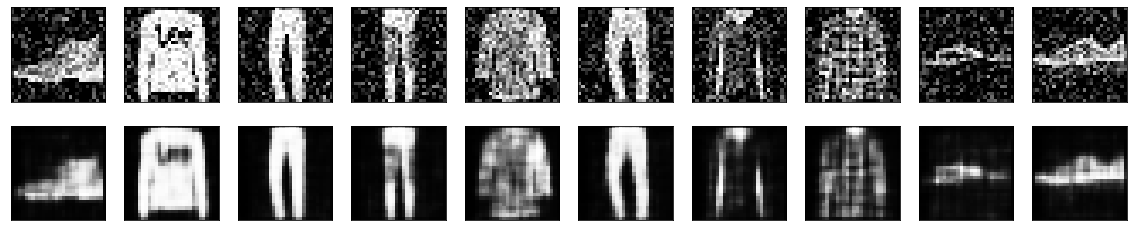

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot